# ImageNet 데이터셋 검증 
> InceptionV3

### import

In [1]:
import os
from datetime import datetime

#### GPU 사용여부# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print(tf.__version__)

2.8.0


#### GPU 사용여부

In [2]:
print("GPU is", "available" if len(tf.config.list_physical_devices('GPU')) > 0 else "NOT AVAILABLE")

GPU is available


# ImageNet load

In [3]:
# Get imagenet labels
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# Set data_dir to a read-only storage of .tar files
# Set write_dir to a w/r storage
data_dir = r"C:\Users\DI Lee\Desktop\research_tensorflow\imagenet"
write_dir = r"C:\Users\DI Lee\Desktop\research_tensorflow\tf-imagenet-dirs"

# Construct a tf.data.Dataset
download_config = tfds.download.DownloadConfig(
                      extract_dir=os.path.join(write_dir, 'extracted'),
                      manual_dir=data_dir
                  )
download_and_prepare_kwargs = {
    'download_dir': os.path.join(write_dir, 'downloaded'),
    'download_config': download_config,
}
ds = tfds.load('imagenet2012_subset', 
               data_dir=os.path.join(write_dir, 'data'),         
               split='validation', 
               shuffle_files=False, 
               download=True, 
               as_supervised=True,
               download_and_prepare_kwargs=download_and_prepare_kwargs)

# InceptionV3

### Preprocess for InceptionV3

image shape: (1, 299, 299, 3) label: ['European fire salamander']


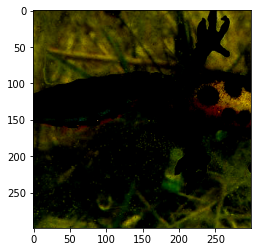

image shape: (1, 299, 299, 3) label: ['mushroom']


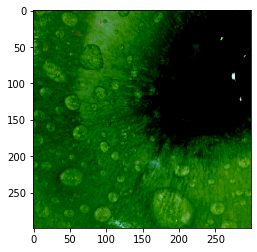

In [4]:
# Preprocess the images
def resize_with_crop_InceptionV3(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 299, 299)
    i = tf.keras.applications.inception_v3.preprocess_input(i)
    return (i, label)

ds_InceptionV3 = ds.map(resize_with_crop_InceptionV3)

# Plot a few
ds_InceptionV3 = ds_InceptionV3.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_InceptionV3.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

# Original weight

## Evaluation

In [5]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\inceptionV3\inception_v3_weights_tf_dim_ordering_tf_kernels.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [6]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>


C:\Users\DI_king\anaconda3\envs\slim\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


50000/50000 [==============================] - 595s 12ms/step - loss: 1.0378 - accuracy: 0.7635


In [15]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.037781834602356, 'accuracy': 0.7634199857711792}


# 30bit weight (zero to last 2-bit)

## Evaluation

In [5]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_30bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [6]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>


C:\Users\DI Lee\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


50000/50000 [==============================] - 637s 13ms/step - loss: 1.0378 - accuracy: 0.7634


In [7]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0378212928771973, 'accuracy': 0.7633799910545349}


# 28bit weight (zero to 4-bit)

## Evaluation

In [8]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_28bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 35, 35, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 35, 35, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 17, 17, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 17, 17, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 17, 17, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 17, 17, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 17, 17, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 17, 17, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 8, 8, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 8, 8, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 8, 8, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [9]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 658s 13ms/step - loss: 1.0378 - accuracy: 0.7634


In [10]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.03782057762146, 'accuracy': 0.7633799910545349}


# 26bit weight (zero to 6-bit)

## Evaluation

In [11]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_26bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                      

 batch_normalization_193 (Batch  (None, 35, 35, 64)  192         ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_195 (Batch  (None, 35, 35, 64)  192         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_198 (Batch  (None, 35, 35, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 35, 35, 32)  96          ['conv2d_199[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_210 (Batch  (None, 35, 35, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_210 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_210[0][0]']
                                                                                                  
 conv2d_208 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_214[0][0]',         
                                                                  'activation_217[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_nor

                                                                  'activation_226[0][0]',         
                                                                  'activation_227[0][0]']         
                                                                                                  
 conv2d_232 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_232 (Batch  (None, 17, 17, 160)  480        ['conv2d_232[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_23

 batch_normalization_242 (Batch  (None, 17, 17, 160)  480        ['conv2d_242[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_242[0][0]']
                                                                                                  
 conv2d_243 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_242[0][0]']         
                                                                                                  
 batch_normalization_243 (Batch  (None, 17, 17, 160)  480        ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_253 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_252[0][0]']         
                                                                                                  
 batch_normalization_253 (Batch  (None, 17, 17, 192)  576        ['conv2d_253[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_253 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_253[0][0]']
                                                                                                  
 conv2d_249 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_253[0][0]']         
          

 activation_261 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_258 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_262 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_258 (Batch  (None, 17, 17, 192)  576        ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 17, 17, 192)  576        ['conv2d_262[0][0]']             
 Normaliza

 conv2d_272 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_25[0][0]']   
                                                                                                  
 batch_normalization_264 (Batch  (None, 8, 8, 320)   960         ['conv2d_264[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_266 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_266[0][0]']
                                                                                                  
 activation_267 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_270[0][0]']
          

                                                                                                  
 activation_276 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_276[0][0]']
                                                                                                  
 activation_279 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_279[0][0]']
                                                                                                  
 activation_280 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 batch_normalization_281 (Batch  (None, 8, 8, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [12]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 632s 13ms/step - loss: 1.0378 - accuracy: 0.7634


In [13]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0378248691558838, 'accuracy': 0.7633799910545349}


# 24bit weight (zero to 8-bit)

## Evaluation

In [14]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_24bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 149, 149, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                      

 conv2d_293 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_27[0][0]']   
                                                                                                  
 batch_normalization_287 (Batch  (None, 35, 35, 64)  192         ['conv2d_287[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_289 (Batch  (None, 35, 35, 64)  192         ['conv2d_289[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_292 (Batch  (None, 35, 35, 96)  288         ['conv2d_292[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_304 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_304 (Batch  (None, 35, 35, 64)  192         ['conv2d_304[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_304 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_304[0][0]']
                                                                                                  
 conv2d_302 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_30

                                                                                                  
 activation_311 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_311[0][0]']
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_308[0][0]',         
                                                                  'activation_311[0][0]',         
                                                                  'max_pooling2d_14[0][0]']       
                                                                                                  
 conv2d_31

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_312[0][0]',         
                                                                  'activation_315[0][0]',         
                                                                  'activation_320[0][0]',         
                                                                  'activation_321[0][0]']         
                                                                                                  
 conv2d_326 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_326 (Batch  (None, 17, 17, 160)  480        ['conv2d_326[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_336 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_336 (Batch  (None, 17, 17, 160)  480        ['conv2d_336[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_336 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_336[0][0]']
                                                                                                  
 conv2d_337 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_336[0][0]']         
                                                                                                  
 batch_normalization_337 (Batch  (None, 17, 17, 160)  480        ['conv2d_337[0][0]']             
 Normaliza

 activation_346 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_346[0][0]']
                                                                                                  
 conv2d_347 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_346[0][0]']         
                                                                                                  
 batch_normalization_347 (Batch  (None, 17, 17, 192)  576        ['conv2d_347[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_347 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_347[0][0]']
                                                                                                  
 conv2d_343 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_355 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_355[0][0]']
                                                                                                  
 conv2d_352 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_356 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_355[0][0]']         
                                                                                                  
 batch_normalization_352 (Batch  (None, 17, 17, 192)  576        ['conv2d_352[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_366 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_34[0][0]']   
                                                                                                  
 batch_normalization_358 (Batch  (None, 8, 8, 320)   960         ['conv2d_358[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_360 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_360[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_361[0][0]']
          

                                                                                                  
 activation_369 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_369[0][0]']
                                                                                                  
 activation_370 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_370[0][0]']
                                                                                                  
 activation_373 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_373[0][0]']
                                                                                                  
 activation_374 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_374[0][0]']
                                                                                                  
 batch_normalization_375 (Batch  (None, 8, 8, 192)   576         ['conv2d_375[0][0]']             
 Normaliza

In [15]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 634s 13ms/step - loss: 1.0378 - accuracy: 0.7634


In [16]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0378233194351196, 'accuracy': 0.7634400129318237}


# 22bit weight (zero to 10-bit)

## Evaluation

In [17]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_22bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 149, 149, 32  96         ['conv2d_376[0][0]']             
 Normalization)                 )                                                      

 conv2d_387 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_36[0][0]']   
                                                                                                  
 batch_normalization_381 (Batch  (None, 35, 35, 64)  192         ['conv2d_381[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_383 (Batch  (None, 35, 35, 64)  192         ['conv2d_383[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_386 (Batch  (None, 35, 35, 96)  288         ['conv2d_386[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_398 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_398 (Batch  (None, 35, 35, 64)  192         ['conv2d_398[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_398 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_398[0][0]']
                                                                                                  
 conv2d_396 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_39

                                                                                                  
 activation_405 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_405[0][0]']
                                                                                                  
 max_pooling2d_18 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_402[0][0]',         
                                                                  'activation_405[0][0]',         
                                                                  'max_pooling2d_18[0][0]']       
                                                                                                  
 conv2d_41

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_406[0][0]',         
                                                                  'activation_409[0][0]',         
                                                                  'activation_414[0][0]',         
                                                                  'activation_415[0][0]']         
                                                                                                  
 conv2d_420 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_420 (Batch  (None, 17, 17, 160)  480        ['conv2d_420[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_430 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_430 (Batch  (None, 17, 17, 160)  480        ['conv2d_430[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_430 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_430[0][0]']
                                                                                                  
 conv2d_431 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_430[0][0]']         
                                                                                                  
 batch_normalization_431 (Batch  (None, 17, 17, 160)  480        ['conv2d_431[0][0]']             
 Normaliza

 activation_440 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_440[0][0]']
                                                                                                  
 conv2d_441 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_440[0][0]']         
                                                                                                  
 batch_normalization_441 (Batch  (None, 17, 17, 192)  576        ['conv2d_441[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_441 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_441[0][0]']
                                                                                                  
 conv2d_437 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_449 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_449[0][0]']
                                                                                                  
 conv2d_446 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_450 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_449[0][0]']         
                                                                                                  
 batch_normalization_446 (Batch  (None, 17, 17, 192)  576        ['conv2d_446[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_460 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_43[0][0]']   
                                                                                                  
 batch_normalization_452 (Batch  (None, 8, 8, 320)   960         ['conv2d_452[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_454 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_454[0][0]']
                                                                                                  
 activation_455 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_455[0][0]']
          

                                                                                                  
 activation_463 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_463[0][0]']
                                                                                                  
 activation_464 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_464[0][0]']
                                                                                                  
 activation_467 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_467[0][0]']
                                                                                                  
 activation_468 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_468[0][0]']
                                                                                                  
 batch_normalization_469 (Batch  (None, 8, 8, 192)   576         ['conv2d_469[0][0]']             
 Normaliza

In [18]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 634s 13ms/step - loss: 1.0377 - accuracy: 0.7635


In [19]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0377172231674194, 'accuracy': 0.7635200023651123}


# 20bit weight (zero to 12-bit)

## Evaluation

In [20]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_20bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 149, 149, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                      

 conv2d_481 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_45[0][0]']   
                                                                                                  
 batch_normalization_475 (Batch  (None, 35, 35, 64)  192         ['conv2d_475[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_477 (Batch  (None, 35, 35, 64)  192         ['conv2d_477[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_480 (Batch  (None, 35, 35, 96)  288         ['conv2d_480[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_492 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_492 (Batch  (None, 35, 35, 64)  192         ['conv2d_492[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_492 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_492[0][0]']
                                                                                                  
 conv2d_490 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_49

                                                                                                  
 activation_499 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_499[0][0]']
                                                                                                  
 max_pooling2d_22 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_496[0][0]',         
                                                                  'activation_499[0][0]',         
                                                                  'max_pooling2d_22[0][0]']       
                                                                                                  
 conv2d_50

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_500[0][0]',         
                                                                  'activation_503[0][0]',         
                                                                  'activation_508[0][0]',         
                                                                  'activation_509[0][0]']         
                                                                                                  
 conv2d_514 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_514 (Batch  (None, 17, 17, 160)  480        ['conv2d_514[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_524 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_524 (Batch  (None, 17, 17, 160)  480        ['conv2d_524[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_524 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_524[0][0]']
                                                                                                  
 conv2d_525 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_524[0][0]']         
                                                                                                  
 batch_normalization_525 (Batch  (None, 17, 17, 160)  480        ['conv2d_525[0][0]']             
 Normaliza

 activation_534 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_534[0][0]']
                                                                                                  
 conv2d_535 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_534[0][0]']         
                                                                                                  
 batch_normalization_535 (Batch  (None, 17, 17, 192)  576        ['conv2d_535[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_535 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_535[0][0]']
                                                                                                  
 conv2d_531 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_543 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_543[0][0]']
                                                                                                  
 conv2d_540 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_544 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_543[0][0]']         
                                                                                                  
 batch_normalization_540 (Batch  (None, 17, 17, 192)  576        ['conv2d_540[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_554 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_52[0][0]']   
                                                                                                  
 batch_normalization_546 (Batch  (None, 8, 8, 320)   960         ['conv2d_546[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_548 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_548[0][0]']
                                                                                                  
 activation_549 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_549[0][0]']
          

                                                                                                  
 activation_557 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_557[0][0]']
                                                                                                  
 activation_558 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_558[0][0]']
                                                                                                  
 activation_561 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_561[0][0]']
                                                                                                  
 activation_562 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_562[0][0]']
                                                                                                  
 batch_normalization_563 (Batch  (None, 8, 8, 192)   576         ['conv2d_563[0][0]']             
 Normaliza

In [21]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 618s 12ms/step - loss: 1.0376 - accuracy: 0.7635


In [22]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.037596583366394, 'accuracy': 0.7634999752044678}


# 18bit weight (zero to 14-bit)

## Evaluation

In [23]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_18bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_564 (Conv2D)            (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 149, 149, 32  96         ['conv2d_564[0][0]']             
 Normalization)                 )                                                      

 conv2d_575 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_54[0][0]']   
                                                                                                  
 batch_normalization_569 (Batch  (None, 35, 35, 64)  192         ['conv2d_569[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_571 (Batch  (None, 35, 35, 64)  192         ['conv2d_571[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_574 (Batch  (None, 35, 35, 96)  288         ['conv2d_574[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_586 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_586 (Batch  (None, 35, 35, 64)  192         ['conv2d_586[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_586 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_586[0][0]']
                                                                                                  
 conv2d_584 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_58

                                                                                                  
 activation_593 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_593[0][0]']
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_590[0][0]',         
                                                                  'activation_593[0][0]',         
                                                                  'max_pooling2d_26[0][0]']       
                                                                                                  
 conv2d_59

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_594[0][0]',         
                                                                  'activation_597[0][0]',         
                                                                  'activation_602[0][0]',         
                                                                  'activation_603[0][0]']         
                                                                                                  
 conv2d_608 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_608 (Batch  (None, 17, 17, 160)  480        ['conv2d_608[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_618 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_618 (Batch  (None, 17, 17, 160)  480        ['conv2d_618[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_618 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_618[0][0]']
                                                                                                  
 conv2d_619 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_618[0][0]']         
                                                                                                  
 batch_normalization_619 (Batch  (None, 17, 17, 160)  480        ['conv2d_619[0][0]']             
 Normaliza

 activation_628 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_628[0][0]']
                                                                                                  
 conv2d_629 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_628[0][0]']         
                                                                                                  
 batch_normalization_629 (Batch  (None, 17, 17, 192)  576        ['conv2d_629[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_629 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_629[0][0]']
                                                                                                  
 conv2d_625 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_637 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_637[0][0]']
                                                                                                  
 conv2d_634 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_638 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_637[0][0]']         
                                                                                                  
 batch_normalization_634 (Batch  (None, 17, 17, 192)  576        ['conv2d_634[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_648 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_61[0][0]']   
                                                                                                  
 batch_normalization_640 (Batch  (None, 8, 8, 320)   960         ['conv2d_640[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_642 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_642[0][0]']
                                                                                                  
 activation_643 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_643[0][0]']
          

                                                                                                  
 activation_651 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_651[0][0]']
                                                                                                  
 activation_652 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_652[0][0]']
                                                                                                  
 activation_655 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_655[0][0]']
                                                                                                  
 activation_656 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_656[0][0]']
                                                                                                  
 batch_normalization_657 (Batch  (None, 8, 8, 192)   576         ['conv2d_657[0][0]']             
 Normaliza

In [24]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 658s 13ms/step - loss: 1.0384 - accuracy: 0.7634


In [25]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0384169816970825, 'accuracy': 0.7634199857711792}


# 16bit weight (zero to 16-bit) - half

## Evaluation

In [26]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_16bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_658 (Conv2D)            (None, 149, 149, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_658 (Batch  (None, 149, 149, 32  96         ['conv2d_658[0][0]']             
 Normalization)                 )                                                      

 conv2d_669 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_63[0][0]']   
                                                                                                  
 batch_normalization_663 (Batch  (None, 35, 35, 64)  192         ['conv2d_663[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_665 (Batch  (None, 35, 35, 64)  192         ['conv2d_665[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_668 (Batch  (None, 35, 35, 96)  288         ['conv2d_668[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_680 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_680 (Batch  (None, 35, 35, 64)  192         ['conv2d_680[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_680 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_680[0][0]']
                                                                                                  
 conv2d_678 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_68

                                                                                                  
 activation_687 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_687[0][0]']
                                                                                                  
 max_pooling2d_30 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_684[0][0]',         
                                                                  'activation_687[0][0]',         
                                                                  'max_pooling2d_30[0][0]']       
                                                                                                  
 conv2d_69

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_688[0][0]',         
                                                                  'activation_691[0][0]',         
                                                                  'activation_696[0][0]',         
                                                                  'activation_697[0][0]']         
                                                                                                  
 conv2d_702 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_702 (Batch  (None, 17, 17, 160)  480        ['conv2d_702[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_712 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_712 (Batch  (None, 17, 17, 160)  480        ['conv2d_712[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_712 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_712[0][0]']
                                                                                                  
 conv2d_713 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_712[0][0]']         
                                                                                                  
 batch_normalization_713 (Batch  (None, 17, 17, 160)  480        ['conv2d_713[0][0]']             
 Normaliza

 activation_722 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_722[0][0]']
                                                                                                  
 conv2d_723 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_722[0][0]']         
                                                                                                  
 batch_normalization_723 (Batch  (None, 17, 17, 192)  576        ['conv2d_723[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_723 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_723[0][0]']
                                                                                                  
 conv2d_719 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_731 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_731[0][0]']
                                                                                                  
 conv2d_728 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_732 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_731[0][0]']         
                                                                                                  
 batch_normalization_728 (Batch  (None, 17, 17, 192)  576        ['conv2d_728[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_742 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_70[0][0]']   
                                                                                                  
 batch_normalization_734 (Batch  (None, 8, 8, 320)   960         ['conv2d_734[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_736 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_736[0][0]']
                                                                                                  
 activation_737 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_737[0][0]']
          

                                                                                                  
 activation_745 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_745[0][0]']
                                                                                                  
 activation_746 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_746[0][0]']
                                                                                                  
 activation_749 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_749[0][0]']
                                                                                                  
 activation_750 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_750[0][0]']
                                                                                                  
 batch_normalization_751 (Batch  (None, 8, 8, 192)   576         ['conv2d_751[0][0]']             
 Normaliza

In [27]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 636s 13ms/step - loss: 1.0378 - accuracy: 0.7628


In [28]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0377596616744995, 'accuracy': 0.7628399729728699}


# 14bit weight (zero to 18-bit)

## Evaluation

In [29]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_14bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_752 (Conv2D)            (None, 149, 149, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_752 (Batch  (None, 149, 149, 32  96         ['conv2d_752[0][0]']             
 Normalization)                 )                                                      

 conv2d_763 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_72[0][0]']   
                                                                                                  
 batch_normalization_757 (Batch  (None, 35, 35, 64)  192         ['conv2d_757[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_759 (Batch  (None, 35, 35, 64)  192         ['conv2d_759[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_762 (Batch  (None, 35, 35, 96)  288         ['conv2d_762[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_774 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_774 (Batch  (None, 35, 35, 64)  192         ['conv2d_774[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_774 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_774[0][0]']
                                                                                                  
 conv2d_772 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_77

                                                                                                  
 activation_781 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_781[0][0]']
                                                                                                  
 max_pooling2d_34 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_778[0][0]',         
                                                                  'activation_781[0][0]',         
                                                                  'max_pooling2d_34[0][0]']       
                                                                                                  
 conv2d_78

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_782[0][0]',         
                                                                  'activation_785[0][0]',         
                                                                  'activation_790[0][0]',         
                                                                  'activation_791[0][0]']         
                                                                                                  
 conv2d_796 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_796 (Batch  (None, 17, 17, 160)  480        ['conv2d_796[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_806 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_806 (Batch  (None, 17, 17, 160)  480        ['conv2d_806[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_806 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_806[0][0]']
                                                                                                  
 conv2d_807 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_806[0][0]']         
                                                                                                  
 batch_normalization_807 (Batch  (None, 17, 17, 160)  480        ['conv2d_807[0][0]']             
 Normaliza

 activation_816 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_816[0][0]']
                                                                                                  
 conv2d_817 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_816[0][0]']         
                                                                                                  
 batch_normalization_817 (Batch  (None, 17, 17, 192)  576        ['conv2d_817[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_817 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_817[0][0]']
                                                                                                  
 conv2d_813 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_825 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_825[0][0]']
                                                                                                  
 conv2d_822 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_826 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_825[0][0]']         
                                                                                                  
 batch_normalization_822 (Batch  (None, 17, 17, 192)  576        ['conv2d_822[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_836 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_79[0][0]']   
                                                                                                  
 batch_normalization_828 (Batch  (None, 8, 8, 320)   960         ['conv2d_828[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_830 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_830[0][0]']
                                                                                                  
 activation_831 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_831[0][0]']
          

                                                                                                  
 activation_839 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_839[0][0]']
                                                                                                  
 activation_840 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_840[0][0]']
                                                                                                  
 activation_843 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_843[0][0]']
                                                                                                  
 activation_844 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_844[0][0]']
                                                                                                  
 batch_normalization_845 (Batch  (None, 8, 8, 192)   576         ['conv2d_845[0][0]']             
 Normaliza

In [30]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 659s 13ms/step - loss: 1.0377 - accuracy: 0.7622


In [31]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0376551151275635, 'accuracy': 0.7621999979019165}


# 12bit weight (zero to 20-bit)

## Evaluation

In [32]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_12bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_846 (Conv2D)            (None, 149, 149, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_846 (Batch  (None, 149, 149, 32  96         ['conv2d_846[0][0]']             
 Normalization)                 )                                                      

 conv2d_857 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_81[0][0]']   
                                                                                                  
 batch_normalization_851 (Batch  (None, 35, 35, 64)  192         ['conv2d_851[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_853 (Batch  (None, 35, 35, 64)  192         ['conv2d_853[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_856 (Batch  (None, 35, 35, 96)  288         ['conv2d_856[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_868 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_868 (Batch  (None, 35, 35, 64)  192         ['conv2d_868[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_868 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_868[0][0]']
                                                                                                  
 conv2d_866 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_86

                                                                                                  
 activation_875 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_875[0][0]']
                                                                                                  
 max_pooling2d_38 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_872[0][0]',         
                                                                  'activation_875[0][0]',         
                                                                  'max_pooling2d_38[0][0]']       
                                                                                                  
 conv2d_88

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_876[0][0]',         
                                                                  'activation_879[0][0]',         
                                                                  'activation_884[0][0]',         
                                                                  'activation_885[0][0]']         
                                                                                                  
 conv2d_890 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_890 (Batch  (None, 17, 17, 160)  480        ['conv2d_890[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_900 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_900 (Batch  (None, 17, 17, 160)  480        ['conv2d_900[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_900 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_900[0][0]']
                                                                                                  
 conv2d_901 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_900[0][0]']         
                                                                                                  
 batch_normalization_901 (Batch  (None, 17, 17, 160)  480        ['conv2d_901[0][0]']             
 Normaliza

 activation_910 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_910[0][0]']
                                                                                                  
 conv2d_911 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_910[0][0]']         
                                                                                                  
 batch_normalization_911 (Batch  (None, 17, 17, 192)  576        ['conv2d_911[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_911 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_911[0][0]']
                                                                                                  
 conv2d_907 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_919 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_919[0][0]']
                                                                                                  
 conv2d_916 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_920 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_919[0][0]']         
                                                                                                  
 batch_normalization_916 (Batch  (None, 17, 17, 192)  576        ['conv2d_916[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_930 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_88[0][0]']   
                                                                                                  
 batch_normalization_922 (Batch  (None, 8, 8, 320)   960         ['conv2d_922[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_924 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_924[0][0]']
                                                                                                  
 activation_925 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_925[0][0]']
          

                                                                                                  
 activation_933 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_933[0][0]']
                                                                                                  
 activation_934 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_934[0][0]']
                                                                                                  
 activation_937 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_937[0][0]']
                                                                                                  
 activation_938 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_938[0][0]']
                                                                                                  
 batch_normalization_939 (Batch  (None, 8, 8, 192)   576         ['conv2d_939[0][0]']             
 Normaliza

In [33]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 632s 13ms/step - loss: 1.1029 - accuracy: 0.7459


In [34]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.1029441356658936, 'accuracy': 0.7458599805831909}


# 10bit weight (zero to 22-bit)

## Evaluation

In [35]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_10bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_940 (Conv2D)            (None, 149, 149, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_940 (Batch  (None, 149, 149, 32  96         ['conv2d_940[0][0]']             
 Normalization)                 )                                                      

 conv2d_951 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_90[0][0]']   
                                                                                                  
 batch_normalization_945 (Batch  (None, 35, 35, 64)  192         ['conv2d_945[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_947 (Batch  (None, 35, 35, 64)  192         ['conv2d_947[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_950 (Batch  (None, 35, 35, 96)  288         ['conv2d_950[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_962 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_962 (Batch  (None, 35, 35, 64)  192         ['conv2d_962[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_962 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_962[0][0]']
                                                                                                  
 conv2d_960 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_96

                                                                                                  
 activation_969 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_969[0][0]']
                                                                                                  
 max_pooling2d_42 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_966[0][0]',         
                                                                  'activation_969[0][0]',         
                                                                  'max_pooling2d_42[0][0]']       
                                                                                                  
 conv2d_97

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_970[0][0]',         
                                                                  'activation_973[0][0]',         
                                                                  'activation_978[0][0]',         
                                                                  'activation_979[0][0]']         
                                                                                                  
 conv2d_984 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_984 (Batch  (None, 17, 17, 160)  480        ['conv2d_984[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_994 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_994 (Batch  (None, 17, 17, 160)  480        ['conv2d_994[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_994 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_994[0][0]']
                                                                                                  
 conv2d_995 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_994[0][0]']         
                                                                                                  
 batch_normalization_995 (Batch  (None, 17, 17, 160)  480        ['conv2d_995[0][0]']             
 Normaliza

 activation_1004 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1004[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1005 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1004[0][0]']        
                                                                                                  
 batch_normalization_1005 (Batc  (None, 17, 17, 192)  576        ['conv2d_1005[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1005 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1005[0][0]'
                                                                 ]                                
          

 conv2d_1012 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 batch_normalization_1012 (Batc  (None, 17, 17, 192)  576        ['conv2d_1012[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1012 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1012[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1013 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1012[0][0]']        
                                                                                                  
 batch_nor

 conv2d_1022 (Conv2D)           (None, 8, 8, 384)    442368      ['activation_1021[0][0]']        
                                                                                                  
 conv2d_1023 (Conv2D)           (None, 8, 8, 384)    442368      ['activation_1021[0][0]']        
                                                                                                  
 average_pooling2d_97 (AverageP  (None, 8, 8, 1280)  0           ['mixed8[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_1016 (Conv2D)           (None, 8, 8, 320)    409600      ['mixed8[0][0]']                 
                                                                                                  
 batch_normalization_1018 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1018[0][0]']            
 hNormaliz

                                                                                                  
 conv2d_1028 (Conv2D)           (None, 8, 8, 384)    442368      ['activation_1026[0][0]']        
                                                                                                  
 conv2d_1031 (Conv2D)           (None, 8, 8, 384)    442368      ['activation_1030[0][0]']        
                                                                                                  
 conv2d_1032 (Conv2D)           (None, 8, 8, 384)    442368      ['activation_1030[0][0]']        
                                                                                                  
 average_pooling2d_98 (AverageP  (None, 8, 8, 2048)  0           ['mixed9[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_10

In [36]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 633s 13ms/step - loss: 11.0052 - accuracy: 0.0075


In [37]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 11.005193710327148, 'accuracy': 0.007519999984651804}


# 8bit weight (zero to 24-bit)

## Evaluation

In [38]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_8bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1034 (Conv2D)           (None, 149, 149, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1034 (Batc  (None, 149, 149, 32  96         ['conv2d_1034[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1041 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1040[0][0]']        
                                                                                                  
 conv2d_1044 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1043[0][0]']        
                                                                                                  
 conv2d_1045 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_99[0][0]']   
                                                                                                  
 batch_normalization_1039 (Batc  (None, 35, 35, 64)  192         ['conv2d_1039[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1046 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1046[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1048 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1048[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1051 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1051[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1052 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1052[0][0]'
          

 batch_normalization_1061 (Batc  (None, 35, 35, 64)  192         ['conv2d_1061[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1061 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1061[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1062 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1061[0][0]']        
                                                                                                  
 batch_normalization_1062 (Batc  (None, 35, 35, 96)  288         ['conv2d_1062[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_102 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1064 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1067 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1066[0][0]']        
                                                                                                  
 conv2d_1072 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1071[0][0]']        
          

                                                                                                  
 activation_1076 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1076[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1081 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1081[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_103 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_10

 batch_normalization_1086 (Batc  (None, 17, 17, 160)  480        ['conv2d_1086[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1091 (Batc  (None, 17, 17, 160)  480        ['conv2d_1091[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1086 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1086[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1091 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1091[0][0]'
          

                                                                                                  
 conv2d_1096 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1095[0][0]']        
                                                                                                  
 conv2d_1101 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1100[0][0]']        
                                                                                                  
 batch_normalization_1096 (Batc  (None, 17, 17, 192)  576        ['conv2d_1096[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1101 (Batc  (None, 17, 17, 192)  576        ['conv2d_1101[0][0]']            
 hNormalization)                                                                                  
          

 activation_1104 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1104[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1108 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1108[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1105 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1104[0][0]']        
                                                                                                  
 conv2d_1109 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1108[0][0]']        
                                                                                                  
 batch_nor

 activation_1112 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1112[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1113 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1113[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1116 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1116[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1117 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1117[0][0]'
          

 batch_normalization_1119 (Batc  (None, 8, 8, 320)   960         ['conv2d_1119[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1121 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1121[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1122 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1122[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1125 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1125[0][0]'
          

In [39]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 643s 13ms/step - loss: 12602.7285 - accuracy: 8.0000e-04


In [40]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 12602.728515625, 'accuracy': 0.0007999999797903001}


# 6bit weight (zero to 26-bit)

## Evaluation

In [41]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_6bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1128 (Conv2D)           (None, 149, 149, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1128 (Batc  (None, 149, 149, 32  96         ['conv2d_1128[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1135 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1134[0][0]']        
                                                                                                  
 conv2d_1138 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1137[0][0]']        
                                                                                                  
 conv2d_1139 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_108[0][0]']  
                                                                                                  
 batch_normalization_1133 (Batc  (None, 35, 35, 64)  192         ['conv2d_1133[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1140 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1140[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1142 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1142[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1145 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1145[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1146 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1146[0][0]'
          

 batch_normalization_1155 (Batc  (None, 35, 35, 64)  192         ['conv2d_1155[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1155 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1155[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1156 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1155[0][0]']        
                                                                                                  
 batch_normalization_1156 (Batc  (None, 35, 35, 96)  288         ['conv2d_1156[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_111 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1158 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1161 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1160[0][0]']        
                                                                                                  
 conv2d_1166 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1165[0][0]']        
          

                                                                                                  
 activation_1170 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1170[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1175 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1175[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_112 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_11

 batch_normalization_1180 (Batc  (None, 17, 17, 160)  480        ['conv2d_1180[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1185 (Batc  (None, 17, 17, 160)  480        ['conv2d_1185[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1180 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1180[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1185 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1185[0][0]'
          

                                                                                                  
 conv2d_1190 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1189[0][0]']        
                                                                                                  
 conv2d_1195 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1194[0][0]']        
                                                                                                  
 batch_normalization_1190 (Batc  (None, 17, 17, 192)  576        ['conv2d_1190[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1195 (Batc  (None, 17, 17, 192)  576        ['conv2d_1195[0][0]']            
 hNormalization)                                                                                  
          

 activation_1198 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1198[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1202 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1202[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1199 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1198[0][0]']        
                                                                                                  
 conv2d_1203 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1202[0][0]']        
                                                                                                  
 batch_nor

 activation_1206 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1206[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1207 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1207[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1210 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1210[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1211 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1211[0][0]'
          

 batch_normalization_1213 (Batc  (None, 8, 8, 320)   960         ['conv2d_1213[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1215 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1215[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1216 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1216[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1219 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1219[0][0]'
          

In [42]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 638s 13ms/step - loss: 12380847798180802295249240064.0000 - accuracy: 0.0012


In [43]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.2380847798180802e+28, 'accuracy': 0.0011599999852478504}


# 4bit weight (zero to 28-bit)

## Evaluation

In [44]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_4bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1222 (Conv2D)           (None, 149, 149, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1222 (Batc  (None, 149, 149, 32  96         ['conv2d_1222[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1229 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1228[0][0]']        
                                                                                                  
 conv2d_1232 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1231[0][0]']        
                                                                                                  
 conv2d_1233 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_117[0][0]']  
                                                                                                  
 batch_normalization_1227 (Batc  (None, 35, 35, 64)  192         ['conv2d_1227[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1234 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1234[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1236 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1236[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1239 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1239[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1240 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1240[0][0]'
          

 batch_normalization_1249 (Batc  (None, 35, 35, 64)  192         ['conv2d_1249[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1249 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1249[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1250 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1249[0][0]']        
                                                                                                  
 batch_normalization_1250 (Batc  (None, 35, 35, 96)  288         ['conv2d_1250[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_120 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1252 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1255 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1254[0][0]']        
                                                                                                  
 conv2d_1260 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1259[0][0]']        
          

                                                                                                  
 activation_1264 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1264[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1269 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1269[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_121 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_12

 batch_normalization_1274 (Batc  (None, 17, 17, 160)  480        ['conv2d_1274[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1279 (Batc  (None, 17, 17, 160)  480        ['conv2d_1279[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1274 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1274[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1279 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1279[0][0]'
          

                                                                                                  
 conv2d_1284 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1283[0][0]']        
                                                                                                  
 conv2d_1289 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1288[0][0]']        
                                                                                                  
 batch_normalization_1284 (Batc  (None, 17, 17, 192)  576        ['conv2d_1284[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1289 (Batc  (None, 17, 17, 192)  576        ['conv2d_1289[0][0]']            
 hNormalization)                                                                                  
          

 activation_1292 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1292[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1296 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1296[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1293 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1292[0][0]']        
                                                                                                  
 conv2d_1297 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1296[0][0]']        
                                                                                                  
 batch_nor

 activation_1300 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1300[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1301 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1301[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1304 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1304[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1305 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1305[0][0]'
          

 batch_normalization_1307 (Batc  (None, 8, 8, 320)   960         ['conv2d_1307[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1309 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1309[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1310 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1310[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1313 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1313[0][0]'
          

In [45]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 646s 13ms/step - loss: 863808117538816.0000 - accuracy: 0.0010


In [46]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 863808117538816.0, 'accuracy': 0.0010000000474974513}


# 2bit weight (zero to 30-bit)

## Evaluation

In [47]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"D:\random_weight\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_2bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1316 (Conv2D)           (None, 149, 149, 32  864         ['input_15[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1316 (Batc  (None, 149, 149, 32  96         ['conv2d_1316[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1323 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1322[0][0]']        
                                                                                                  
 conv2d_1326 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1325[0][0]']        
                                                                                                  
 conv2d_1327 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_126[0][0]']  
                                                                                                  
 batch_normalization_1321 (Batc  (None, 35, 35, 64)  192         ['conv2d_1321[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1328 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1328[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1330 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1330[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1333 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1333[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1334 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1334[0][0]'
          

 batch_normalization_1343 (Batc  (None, 35, 35, 64)  192         ['conv2d_1343[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1343 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1343[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1344 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1343[0][0]']        
                                                                                                  
 batch_normalization_1344 (Batc  (None, 35, 35, 96)  288         ['conv2d_1344[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_129 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1346 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1349 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1348[0][0]']        
                                                                                                  
 conv2d_1354 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1353[0][0]']        
          

                                                                                                  
 activation_1358 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1358[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1363 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1363[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_130 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_13

 batch_normalization_1368 (Batc  (None, 17, 17, 160)  480        ['conv2d_1368[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1373 (Batc  (None, 17, 17, 160)  480        ['conv2d_1373[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1368 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1368[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1373 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1373[0][0]'
          

                                                                                                  
 conv2d_1378 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1377[0][0]']        
                                                                                                  
 conv2d_1383 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1382[0][0]']        
                                                                                                  
 batch_normalization_1378 (Batc  (None, 17, 17, 192)  576        ['conv2d_1378[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1383 (Batc  (None, 17, 17, 192)  576        ['conv2d_1383[0][0]']            
 hNormalization)                                                                                  
          

 activation_1386 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1386[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1390 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1390[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1387 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1386[0][0]']        
                                                                                                  
 conv2d_1391 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1390[0][0]']        
                                                                                                  
 batch_nor

 activation_1394 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1394[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1395 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1395[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1398 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1398[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1399 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1399[0][0]'
          

 batch_normalization_1401 (Batc  (None, 8, 8, 320)   960         ['conv2d_1401[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1403 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1403[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1404 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1404[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1407 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1407[0][0]'
          

In [48]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 633s 13ms/step - loss: nan - accuracy: 0.0010


In [49]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': nan, 'accuracy': 0.0010000000474974513}


---
---
---

# Visualization
> top-1 accuracy

In [50]:
accuracy_decend = [0.7634199857711792, 0.7633799910545349, 0.7633799910545349, 0.7633799910545349, 0.7634400129318237, 0.7635200023651123, 0.7634999752044678, 0.7634199857711792, 0.7628399729728699, 0.7621999979019165, 0.7458599805831909, 0.007519999984651804, 0.0007999999797903001, 0.0011599999852478504, 0.0010000000474974513, 0.0010000000474974513]
accuracy_decend

[0.7634199857711792,
 0.7633799910545349,
 0.7633799910545349,
 0.7633799910545349,
 0.7634400129318237,
 0.7635200023651123,
 0.7634999752044678,
 0.7634199857711792,
 0.7628399729728699,
 0.7621999979019165,
 0.7458599805831909,
 0.007519999984651804,
 0.0007999999797903001,
 0.0011599999852478504,
 0.0010000000474974513,
 0.0010000000474974513]

In [51]:
bit_accend = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
bit_decend = bit_accend[::-1]

In [52]:
bit_decend

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2]

### 전체적인 시각화

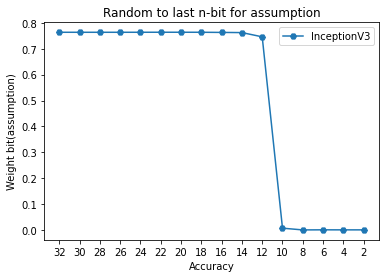

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend, accuracy_decend, marker='H')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Random to last n-bit for assumption')
plt.legend(['InceptionV3'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend)

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 32~12비트까지 시각화

In [54]:
bit_decend[:11]

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12]

In [55]:
len(accuracy_decend[:11])

11

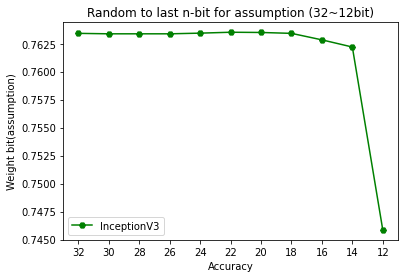

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[:11], accuracy_decend[:11], marker='H', color='green')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Random to last n-bit for assumption (32~12bit)')
plt.legend(['InceptionV3'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[:11])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 12~2비트까지 시각화

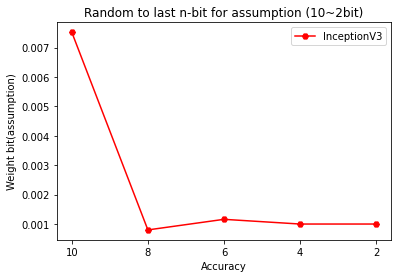

In [57]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[11:], accuracy_decend[11:], marker='H', color='red')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Random to last n-bit for assumption (10~2bit)')
plt.legend(['InceptionV3'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[11:])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()